In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, ShuffleSplit

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/diamond_pricing.csv'
df = pd.read_csv(url)
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [3]:
# divide data into input and output (X,y)
X = df.drop('Price', axis=1)
y = df['Price']

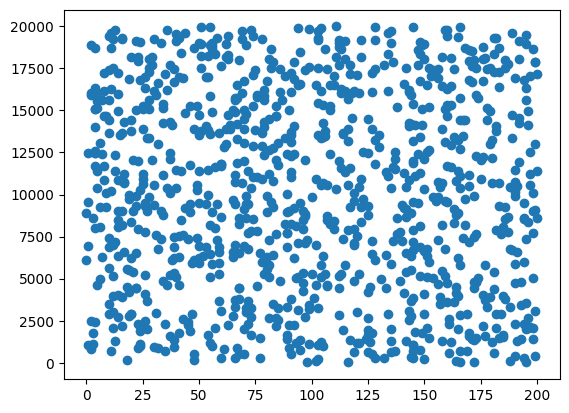

In [4]:
plt.scatter('Paleonium', 'Pressure', data=X)

In [5]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 16696.24042906324
MAE 95.47777612268501
R2 0.96126065658752


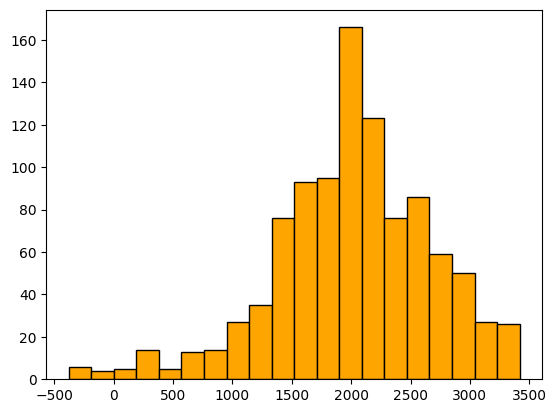

In [6]:
plt.hist(y, bins=20,edgecolor='black', color='orange')
plt.show()

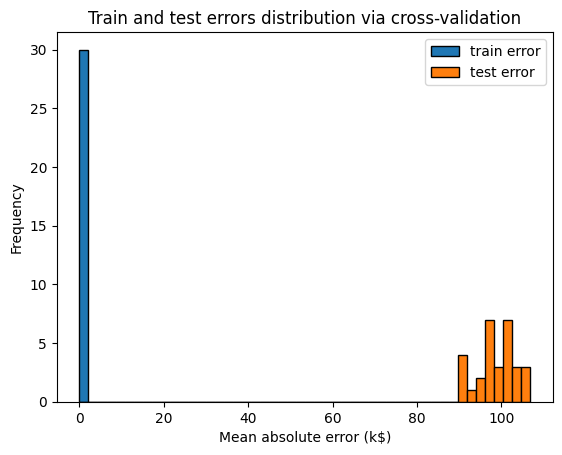

In [7]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(
    model,
    X,
    y,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=-1,
)
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]
]
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

# model overfitting, not good to use

CPU times: user 114 ms, sys: 27.6 ms, total: 142 ms
Wall time: 1.41 s


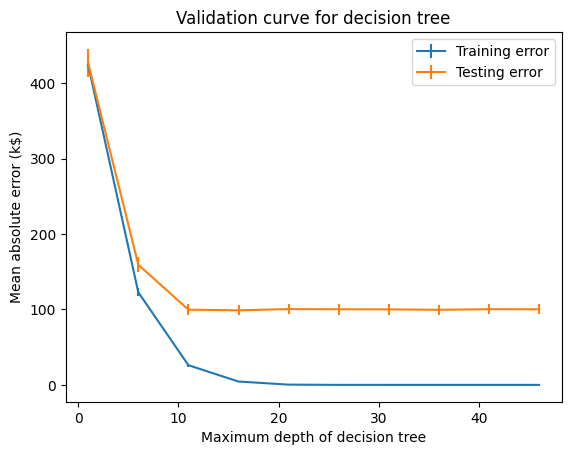

In [8]:
%%time
from sklearn.model_selection import validation_curve

max_depth = list(range(1, 50, 5))
train_scores, test_scores = validation_curve(
    model,
    X,
    y,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
train_errors, test_errors = -train_scores, -test_scores
plt.errorbar(
    max_depth,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label="Training error",
)
plt.errorbar(
    max_depth,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label="Testing error",
)
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

In [9]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 18303.62312102373
MAE 100.47557612304995
R2 0.9575311373365429


In [10]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

# grid search

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [13]:
param_grid = {
    'max_depth': list(range(2, 25)),
    'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'min_samples_split' : list(range(2, 5)),
}
model = DecisionTreeRegressor()
cv = ShuffleSplit(n_splits=10, test_size=0.2)
grid = GridSearchCV(
    estimator=model,
    param_grid =param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=cv,
    verbose=1,
)   

In [14]:
# parameters
grid.fit(X_train, y_train)

Fitting 10 folds for each of 276 candidates, totalling 2760 fits


/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
690 fits failed out of a total of 2760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
690 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1320, in fit
    super()._fit(
  File "/Us

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24],
                         'min_samples_split': [2, 3, 4]},
             scoring='neg_mean_absolute_error', verbose=1)

In [15]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 13, 'min_samples_split': 2}

In [16]:
result = pd.DataFrame(grid.cv_results_)
result.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
33,0.001495,0.000175,0.000569,0.000144,squared_error,13,2,"{'criterion': 'squared_error', 'max_depth': 13...",-96.731610,-105.194563,...,-87.603700,-106.800072,-90.780646,-92.771782,-90.995674,-106.286296,-94.657905,-97.005894,6.613733,1
34,0.001939,0.001092,0.000707,0.000433,squared_error,13,3,"{'criterion': 'squared_error', 'max_depth': 13...",-96.794197,-103.307344,...,-84.798597,-108.148037,-86.317636,-96.005282,-94.615985,-110.591208,-96.562562,-97.158800,7.905321,2
102,0.001804,0.000765,0.000681,0.000521,friedman_mse,13,2,"{'criterion': 'friedman_mse', 'max_depth': 13,...",-95.814029,-101.353101,...,-92.083166,-105.813789,-87.520564,-94.349166,-93.047665,-107.179132,-98.031954,-97.413736,5.843559,3
31,0.001792,0.000721,0.000972,0.000952,squared_error,12,3,"{'criterion': 'squared_error', 'max_depth': 12...",-94.287736,-104.347048,...,-91.560667,-111.149131,-88.374024,-93.626387,-95.821854,-109.222076,-94.354677,-97.559278,7.407933,4
99,0.001820,0.000897,0.000867,0.000594,friedman_mse,12,2,"{'criterion': 'friedman_mse', 'max_depth': 12,...",-97.896437,-104.418711,...,-94.389611,-107.560273,-87.234740,-93.884291,-95.049353,-98.781810,-98.959875,-97.705522,5.372342,5
104,0.004855,0.004421,0.004809,0.010003,friedman_mse,13,4,"{'criterion': 'friedman_mse', 'max_depth': 13,...",-93.496679,-101.990391,...,-92.009220,-110.780919,-88.335180,-95.503525,-97.692564,-105.587938,-97.963277,-97.914384,6.305513,6
32,0.002250,0.001162,0.000936,0.000655,squared_error,12,4,"{'criterion': 'squared_error', 'max_depth': 12...",-91.412788,-103.211475,...,-97.057544,-111.268338,-86.512937,-93.477904,-99.384909,-107.315502,-93.667633,-97.992424,7.136336,7
35,0.002195,0.000971,0.000953,0.000650,squared_error,13,4,"{'criterion': 'squared_error', 'max_depth': 13...",-91.890517,-101.060939,...,-91.451598,-110.262733,-89.127389,-95.869868,-97.073520,-109.150730,-96.664373,-98.056744,6.709405,8
168,0.012809,0.005145,0.000989,0.000482,absolute_error,12,2,"{'criterion': 'absolute_error', 'max_depth': 1...",-93.479835,-106.250418,...,-94.757083,-97.664453,-93.039848,-97.661211,-93.104762,-103.084454,-100.827546,-98.070720,4.355000,9
106,0.001873,0.000927,0.000632,0.000409,friedman_mse,14,3,"{'criterion': 'friedman_mse', 'max_depth': 14,...",-95.577761,-100.355270,...,-91.853472,-107.126535,-88.554981,-96.190872,-94.166738,-107.931800,-102.875014,-98.123088,6.032267,10


In [17]:
final_model = DecisionTreeRegressor(**grid.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 16813.235951993694
MAE 93.54586496334836
R2 0.9609891984853334


In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
df.head(2)

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
reg2 = RandomForestRegressor(max_depth=10)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
# metrics
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 7871.028197734757
MAE 70.16121901446883
R2 0.9817372979469925


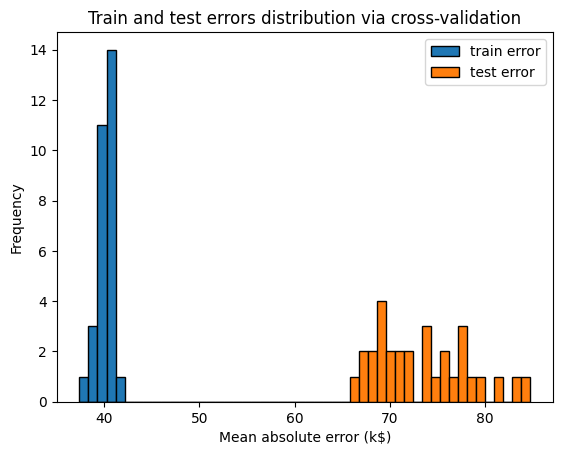

In [22]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
model = RandomForestRegressor(max_depth=10)
cv_results = cross_validate(
    model,
    X,
    y,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=-1,
)
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]
]
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

CPU times: user 324 ms, sys: 37.5 ms, total: 362 ms
Wall time: 17.5 s


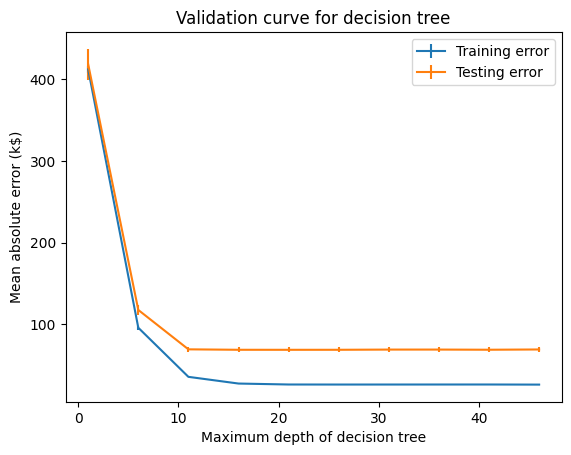

In [23]:
%%time
from sklearn.model_selection import validation_curve

max_depth = list(range(1, 50, 5))
model = RandomForestRegressor()
train_scores, test_scores = validation_curve(
    model,
    X,
    y,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
train_errors, test_errors = -train_scores, -test_scores
plt.errorbar(
    max_depth,
    train_errors.mean(axis=1),
    yerr=train_errors.std(axis=1),
    label="Training error",
)
plt.errorbar(
    max_depth,
    test_errors.mean(axis=1),
    yerr=test_errors.std(axis=1),
    label="Testing error",
)
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")